In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

## Traitement des données

In [232]:
data = pd.read_csv('C:\\Users\\Public\\Documents\\en.openfoodfacts.org.products.csv',sep='\t')

In [4]:
data.shape

(2059358, 187)

In [5]:
data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:origins-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uplo

### Idée d'application

Une application pour les sportifs soucieux de controler leur apport en macro nutriments et vitamines ainsi que de surveiller leur apport calorique.

In [124]:

data.columns[data.columns.str.contains('pnns')]


Index(['pnns_groups_1', 'pnns_groups_2'], dtype='object')

In [231]:
def filtre_colonnes(dataframe):
    candidate_col = ['code','product_name','brands','pnns_groups_1','pnns_groups_2' ,'energy-kcal_100g','carbohydrates_100g', 'sugars_100g', 'fat_100g', 'proteins_100g','salt_100g', 'glycemic-index_100g',
                 'beta-carotene_100g','vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g',
       'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g',
       'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g',
       'vitamin-b12_100g','biotin_100g', 'pantothenic-acid_100g','bicarbonate_100g', 'potassium_100g', 'chloride_100g',
       'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g',
       'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g',
       'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g',
       'caffeine_100g', 'taurine_100g', 'countries']
    return dataframe[candidate_col]

In [233]:
data_f = filtre_colonnes(data)

In [127]:
data_f.shape

(2059358, 44)

In [128]:
data_f['product_name'].isna().sum()

83377

On peut considérer que le produits ne contenant pas de noms sont inutiles pour notre application.
Nous les supprimons.

In [129]:

data_f = data_f[~data_f['product_name'].isna()]

In [38]:
data_f.shape

(1975981, 42)

In [39]:
data.countries.unique().tolist()

['en:france',
 'Spain',
 'France',
 'Espagne',
 'en:es',
 'en:United States',
 'en:fr',
 'United States',
 'en:France',
 'Irlande',
 'en:FR',
 nan,
 'en:be',
 'United Kingdom',
 'États-Unis, en:france',
 'France, United States',
 'France,États-Unis',
 'España',
 'en:Ivory Coast',
 'Canada',
 'Suisse',
 'en:it',
 'Germany',
 'France,Belgique',
 'Belgium',
 'France, États-Unis',
 'Pérou',
 'en:germany',
 'en:united-kingdom',
 'Schweiz',
 'en:us',
 'Oman',
 'Deutschland',
 'Slovenia',
 'en:DE',
 'en:de',
 'Frankreich, Deutschland',
 'France,Germany,Netherlands',
 'en:KW',
 'ફ્રાન્સ',
 'en:spain',
 'en:ae',
 'en:United Kingdom',
 'France,Switzerland',
 'Frankreich, en:de',
 'France, en:de',
 'en:India',
 'Italy',
 'Romania',
 'en:US',
 'Australia',
 'en:Norway',
 'en:ch',
 'us',
 'en:lu',
 'en:Spain',
 'en:United Arab Emirates',
 'en:Italy',
 'Portugal',
 'en:Mexico',
 'en:Dominican Republic',
 'en:RE',
 'en:Ireland',
 'en:gb',
 'en:Canada',
 'United Kingdom,en:united-kingdom',
 'Israel',


ETant donné qu'il s'agit d'une application pour Santé publique France, limitons à la France.

In [234]:
def filtre_pays(dataframe):
        liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']           
        return dataframe[dataframe['countries'].isin(liste_pays)]

In [235]:
data_f = filtre_pays(data_f)

In [236]:
data_f.to_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet3-Openclassrooms-master\\Projet3-Openclassrooms-master\\data_f.csv', index=False)
#data_f = pd.read_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet3-Openclassrooms-master\\Projet3-Openclassrooms-master\\data_f.csv')
#data_f.drop(columns=['Unnamed: 0'], inplace=True)

In [237]:
data_f.dtypes

code                      object
product_name              object
brands                    object
pnns_groups_1             object
pnns_groups_2             object
energy-kcal_100g         float64
carbohydrates_100g       float64
sugars_100g              float64
fat_100g                 float64
proteins_100g            float64
salt_100g                float64
glycemic-index_100g      float64
beta-carotene_100g       float64
vitamin-a_100g           float64
vitamin-d_100g           float64
vitamin-e_100g           float64
vitamin-k_100g           float64
vitamin-c_100g           float64
vitamin-b1_100g          float64
vitamin-b2_100g          float64
vitamin-pp_100g          float64
vitamin-b6_100g          float64
vitamin-b9_100g          float64
vitamin-b12_100g         float64
biotin_100g              float64
pantothenic-acid_100g    float64
bicarbonate_100g         float64
potassium_100g           float64
chloride_100g            float64
calcium_100g             float64
phosphorus

In [6]:
for col in data_f.columns:
    txNan = data_f[col].isna().sum()/data_f.shape[0]
    print(f'{col:-<50}{txNan}')

code----------------------------------------------0.0
product_name--------------------------------------0.0
brands--------------------------------------------0.47983548145867244
pnns_groups_1-------------------------------------1.4662971597824016e-06
pnns_groups_2-------------------------------------0.0
categories----------------------------------------0.518011994310767
energy-kcal_100g----------------------------------0.22943298288831215
carbohydrates_100g--------------------------------0.20268332380240178
fat_100g------------------------------------------0.20247657590287246
proteins_100g-------------------------------------0.2001510286074576
salt_100g-----------------------------------------0.22494024839073887
glycemic-index_100g-------------------------------0.9999956011085207
beta-carotene_100g--------------------------------0.9999398818164489
vitamin-a_100g------------------------------------0.9987433833340665
vitamin-d_100g------------------------------------0.9982858986202143
vi

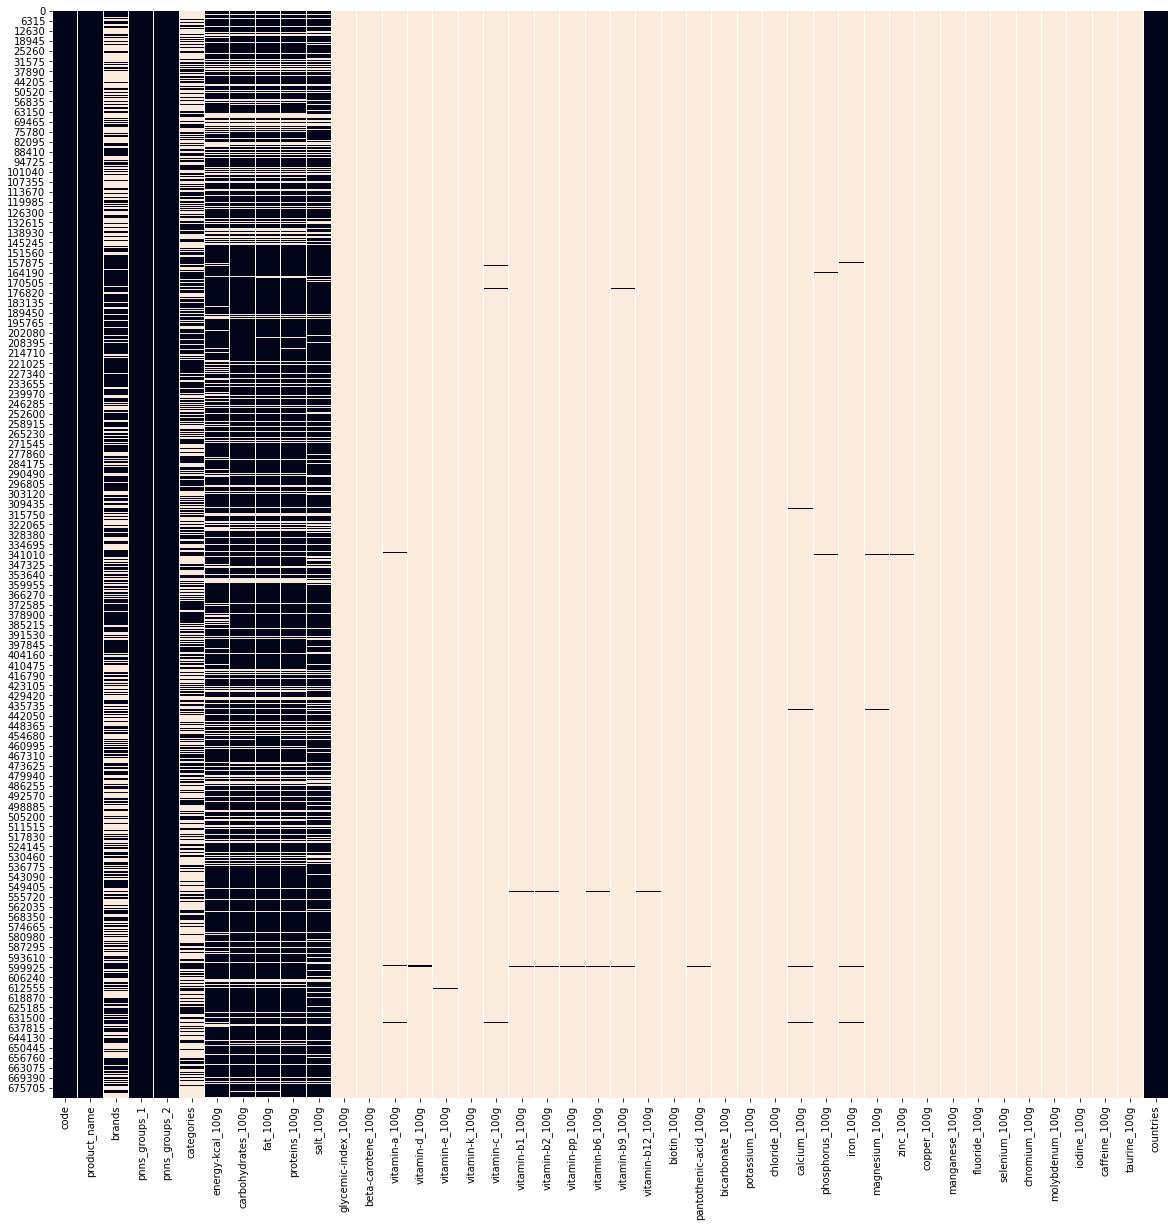

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(data_f.isna(), cbar=False)
plt.show()

In [8]:
def del_nan(dataframe, taux_nan_max) :    
    #remplacement des "faux NaN" en NaN reconnus par pandas
    dataframe = dataframe.replace(to_replace = '^nan$', value = np.nan, regex=True)
    
    liste_col = []
    for col in dataframe.columns:
        if dataframe[col].isna().sum()/dataframe.shape[0] > taux_nan_max:
            dataframe = dataframe.drop(columns=[col])    
    
    return dataframe

In [238]:
data_f = del_nan(data_f, 0.9)

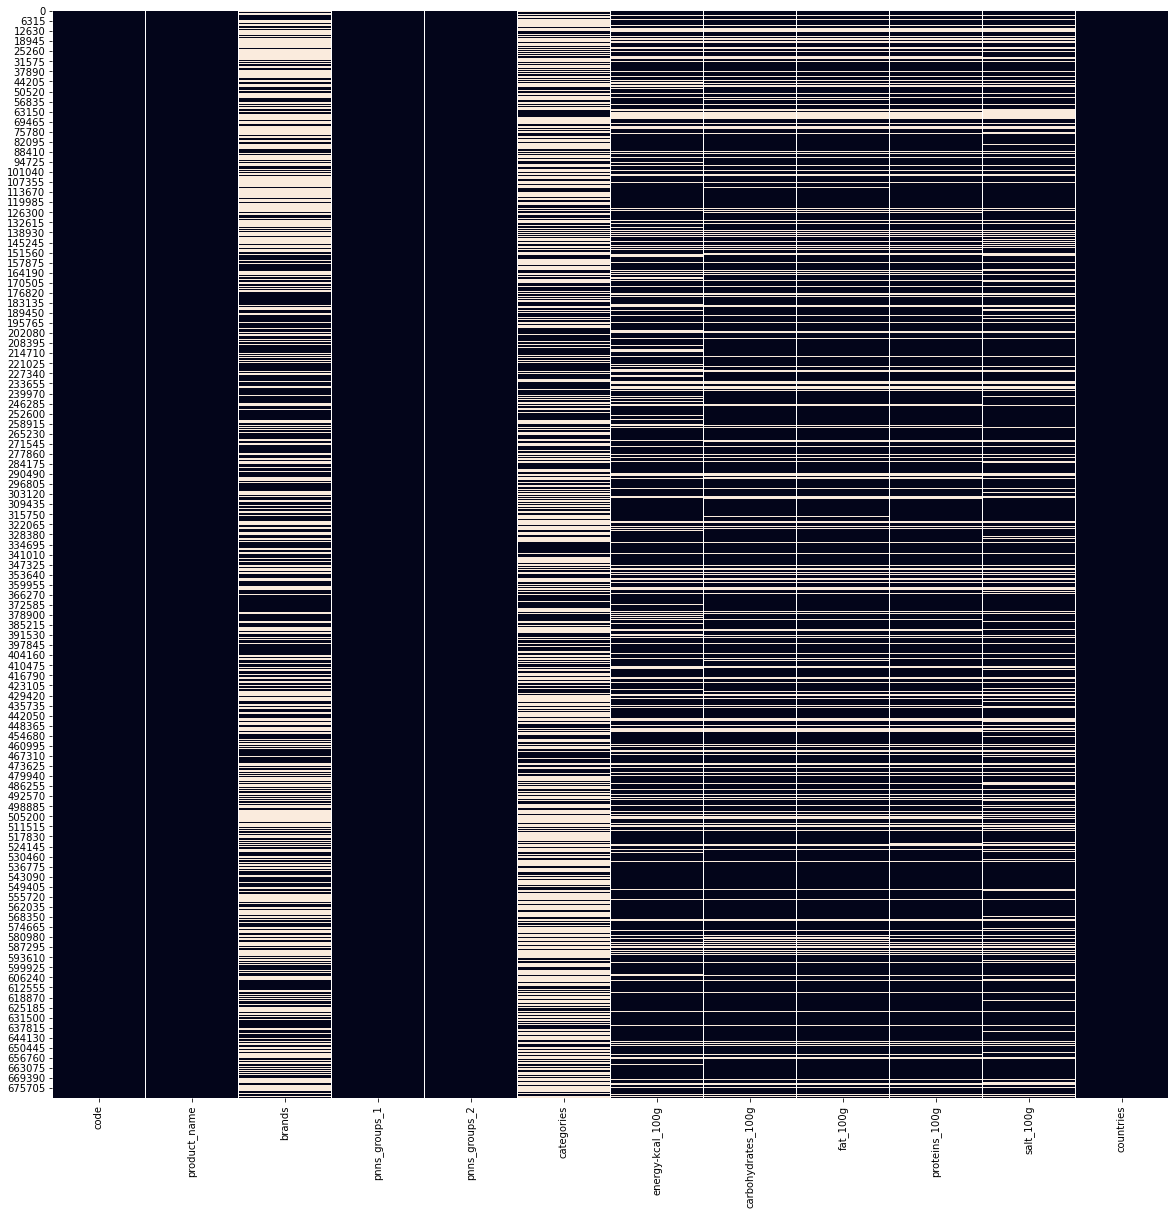

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data_f.isna(), cbar=False)
plt.show()

Il y a des produits pour lesquels nous n'avons ni energie, ni les macro (glucides, lipides, proteines).
Ces lignes sont inutiles alors pour notre application qui se repose en priorité sur ces informations.

## Traitement des outliers

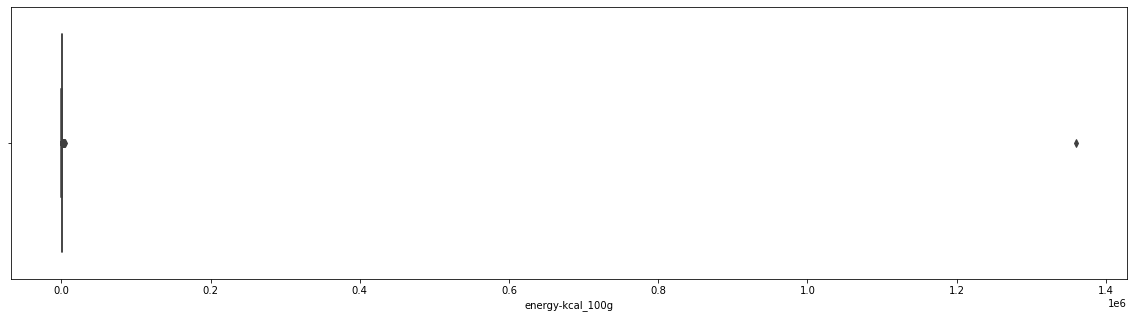

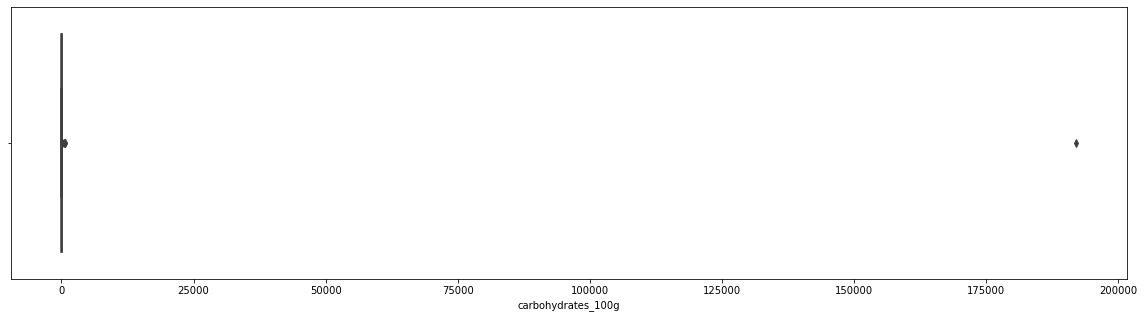

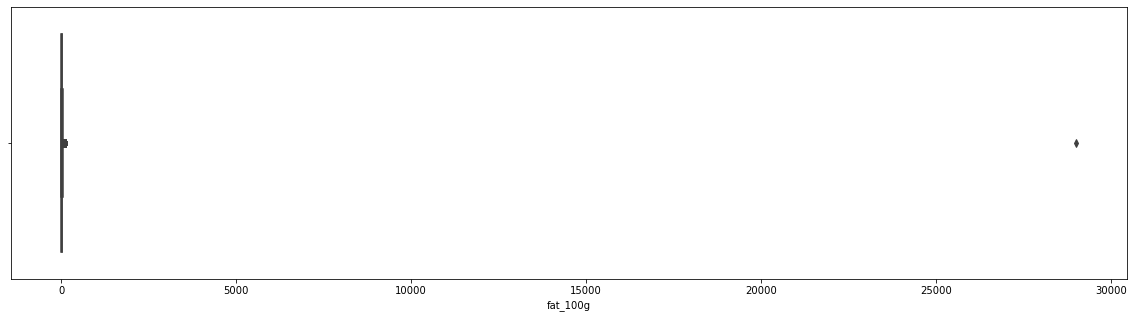

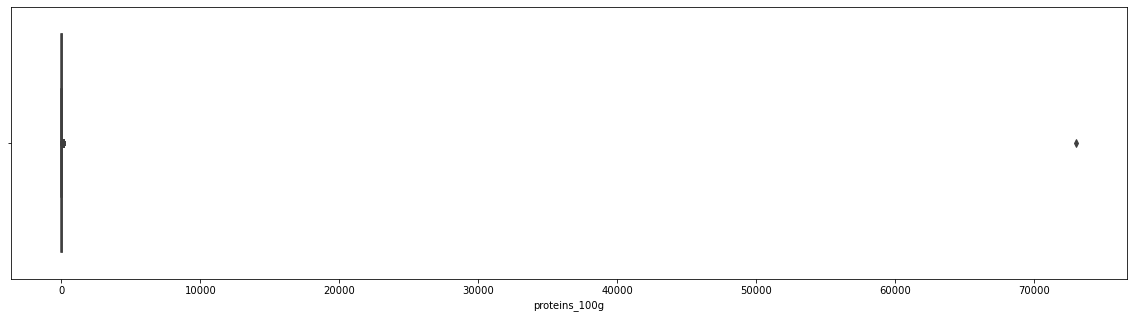

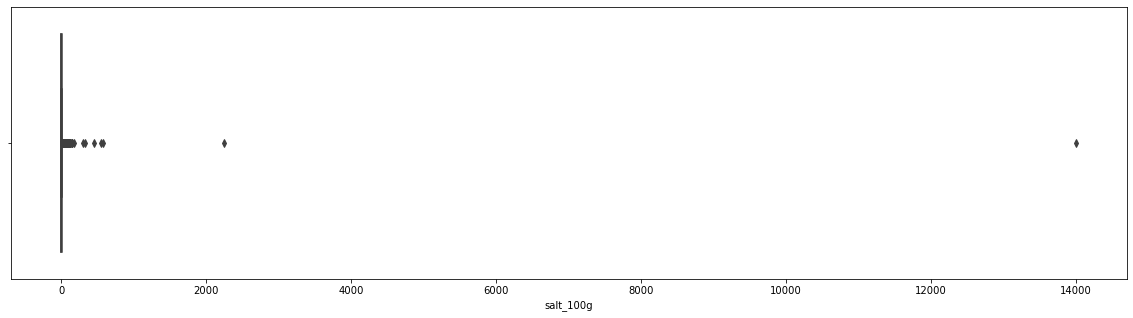

In [84]:
import warnings
warnings.filterwarnings("ignore")
for col in data_f.select_dtypes(include = ['int32','float64']).columns:
    plt.figure(figsize=(20,5))    
    sns.boxplot(data_f[col])
    plt.show()

On voit qu'il y a un enregistrement aberrant:

In [108]:
data_f[data_f['energy-kcal_100g'] == 1360000.0]

,product_name,brands,packaging,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries
215718,Nems crevette cabillaud et sauce nuoc mam,Itinéraire des Saveurs,plastique,"Plats préparés, Nems",1360000.0,192000.0,29000.0,73000.0,14000.0,France


Meme si les nems aux crevette ne doivent pas être healthy, plus d'1 millions de calories semblent bien exagéré.
Supprimons  cette donnée.

In [11]:
data_f.drop(index=data_f[data_f['energy-kcal_100g'] == 1360000.0].index, inplace=True)

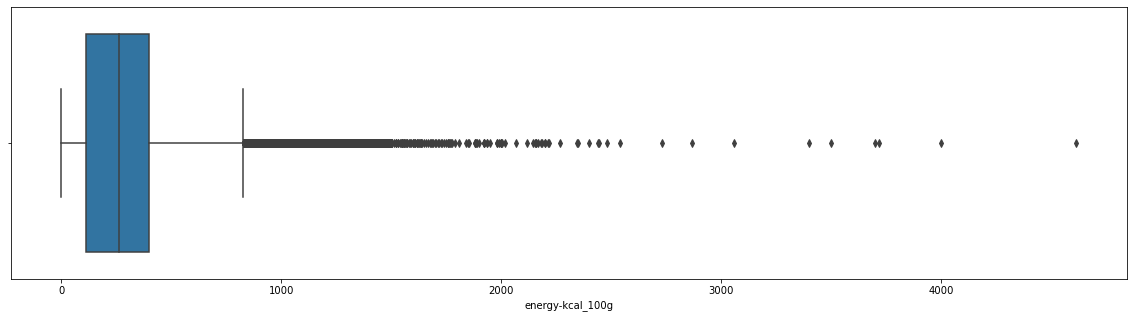

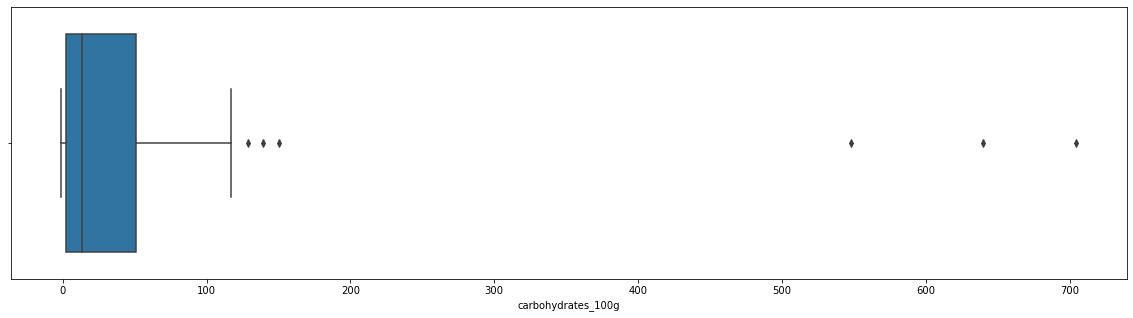

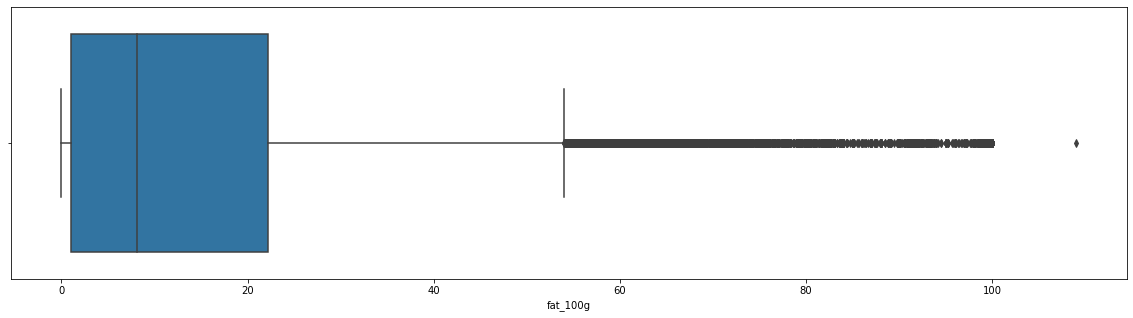

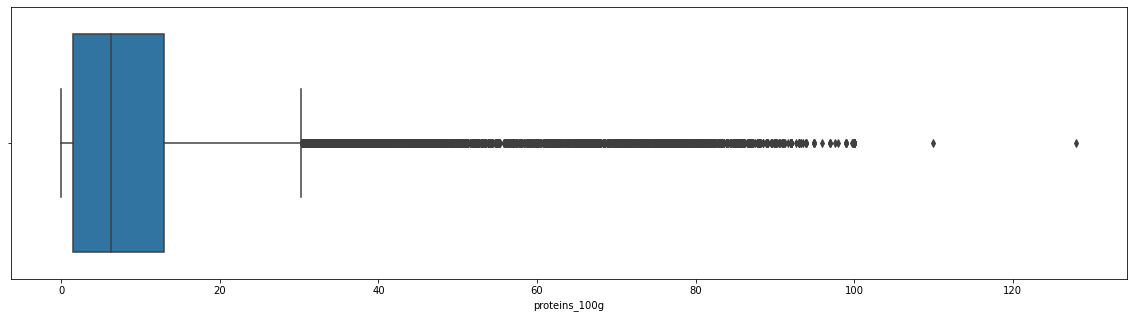

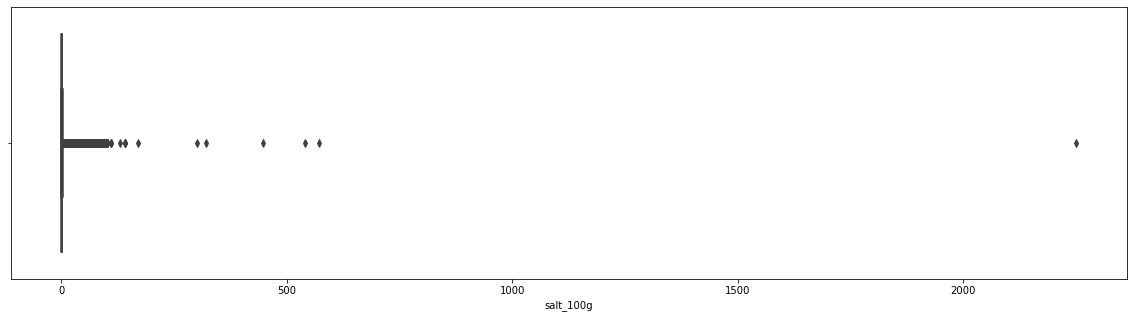

In [87]:
import warnings
warnings.filterwarnings("ignore")
for col in data_f.select_dtypes(include = ['int32','float64']).columns:
    plt.figure(figsize=(20,5))    
    sns.boxplot(data_f[col])
    plt.show()

In [110]:
data_f[data_f['carbohydrates_100g'] == data_f['carbohydrates_100g'].max()]

,product_name,brands,packaging,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries
51764,Torsades aux oeufs frais,Lustucru,sachet plastique,"Aliments et boissons à base de végétaux, Aliments d'origine végétale, Céréales et pommes de terre, Céréales et dérivés, Pâtes alimentaires",374.0,704.5,3.5,14.0,0.02,France


On voit pour cet enregistrement que les proteines, sels, fat et energy semblent cohérent mais le taux de carbohydrates est clairement aberrant.
En fait, il apparait 10 fois plus élevé.

In [17]:
data_f['carbohydrates_100g'] = data_f['carbohydrates_100g'].replace([704.5],70.45)
data_f[data_f['carbohydrates_100g'] == data_f['carbohydrates_100g'].max()]

,code,product_name,brands,pnns_groups_1,pnns_groups_2,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries
3196,0028400642033,Nacho Cheese Flavored Tortilla Chips,Doritos,Salty snacks,Appetizers,"Snacks, Salty snacks, Appetizers, Chips and fr...",1250.0,150.0,66.7,16.7,4.38,France


In [12]:
data_f.drop(index=data_f[data_f['carbohydrates_100g'] == 1360000.0].index, inplace=True)

In [13]:
data_f.drop(index=data_f[data_f['carbohydrates_100g'] == 640.0].index, inplace=True)

In [122]:
data_f[data_f['carbohydrates_100g'] ==data_f['carbohydrates_100g'].max()]

,product_name,brands,packaging,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries
548198,Simply Sesame,Ryvita,en:card-box,"Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Breads, Crispbreads",381.0,548.0,6.67,128.0,0.0952,Francia


Ici aussi les valeurs sont clairement aberreantes (128g de proteines pour 100g!)
On pourrait considérer que les protéines et carbohydrates sont multipliés par 10 mais le calcul des calories à partir des macros ne concorderaient pas.
On supprime donc l'enregistrement.

In [14]:
data_f.drop(index=data_f[data_f['carbohydrates_100g'] == 548.0].index, inplace=True)

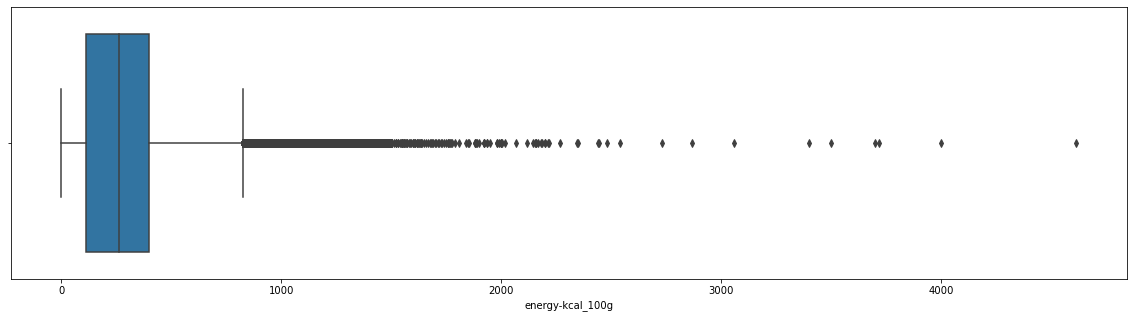

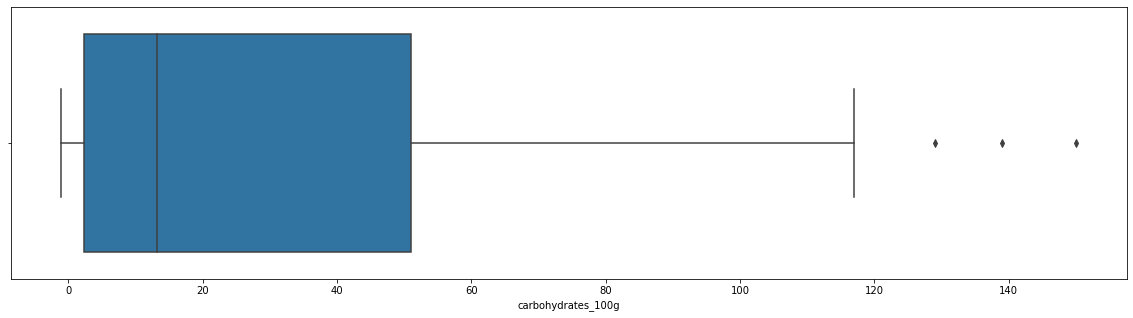

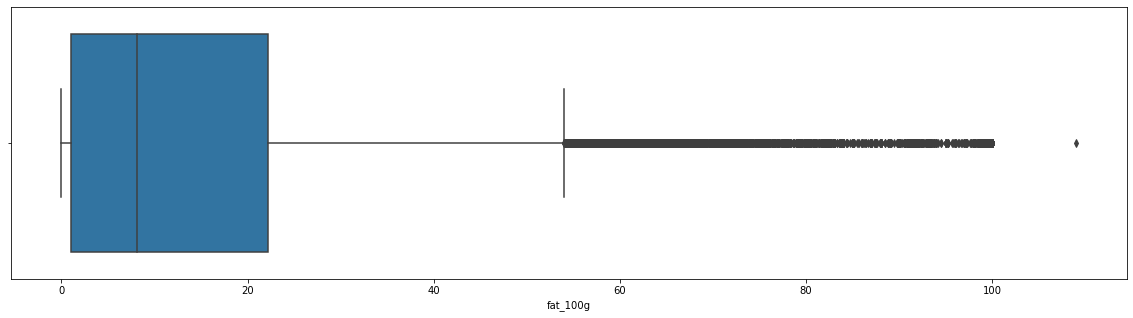

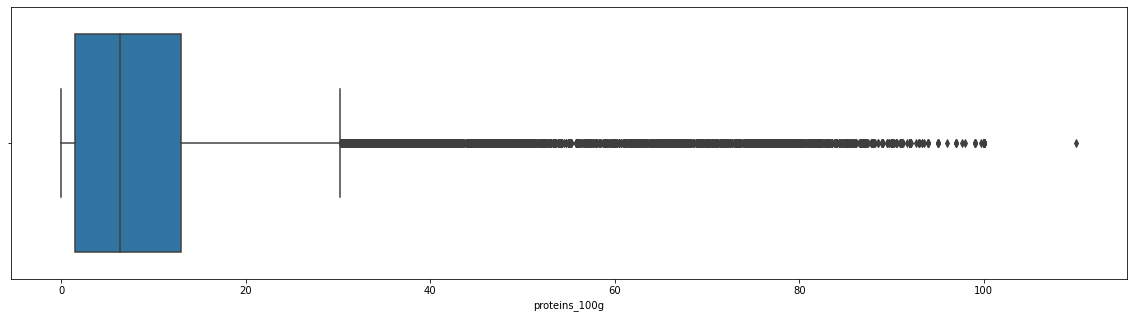

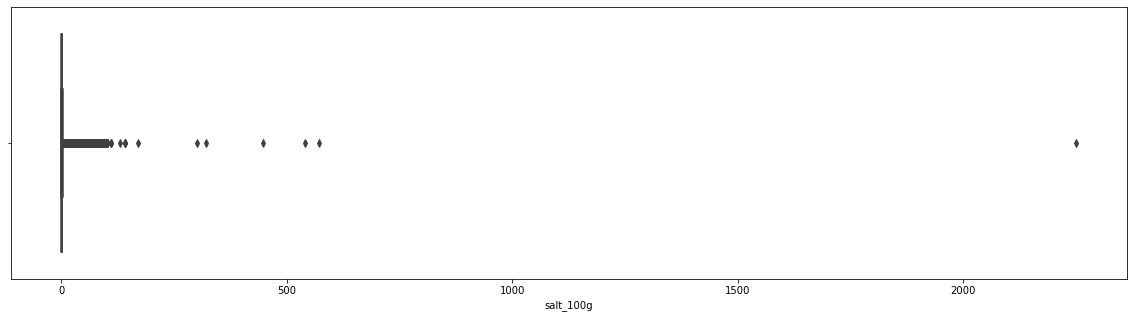

In [18]:
import warnings
warnings.filterwarnings("ignore")
for col in data_f.select_dtypes(include = ['int32','float64']).columns:
    plt.figure(figsize=(20,5))    
    sns.boxplot(data_f[col])
    plt.show()

In [19]:
data_f[data_f['salt_100g'] ==data_f['salt_100g'].max()]

,code,product_name,brands,pnns_groups_1,pnns_groups_2,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries
343157,3460341505560,Bouillons de legumes,NaN,unknown,unknown,"Aliments et boissons à base de végétaux, Alime...",9.2,0.76,0.6,0.14,2250.0,France


Le taux de sel est aberrant (2250 g pour 100g). On le remplace par NaN

In [21]:
data_f['salt_100g'] = data_f['salt_100g'].replace([2250.0],np.nan)

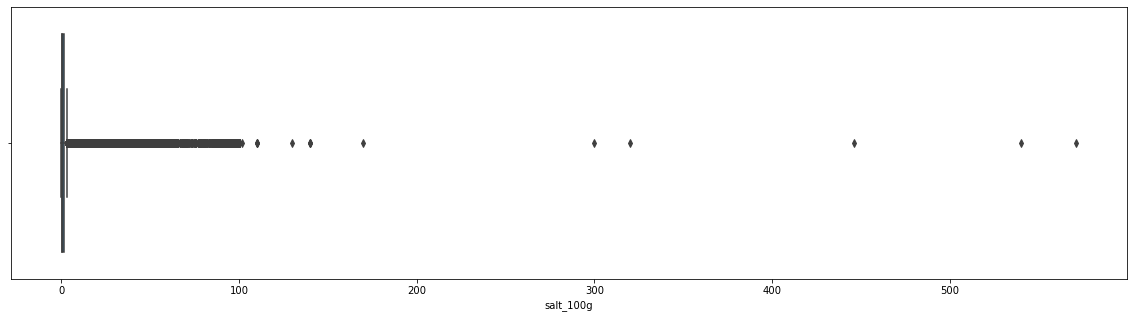

In [23]:
plt.figure(figsize=(20,5))
sns.boxplot(data_f['salt_100g'])
plt.show()

In [55]:
data_f[data_f['carbohydrates_100g'] > 100].index

Int64Index([3196, 254783, 285492, 372708, 521107, 539122, 539482], dtype='int64')

In [88]:
clean_outliers(data_f)

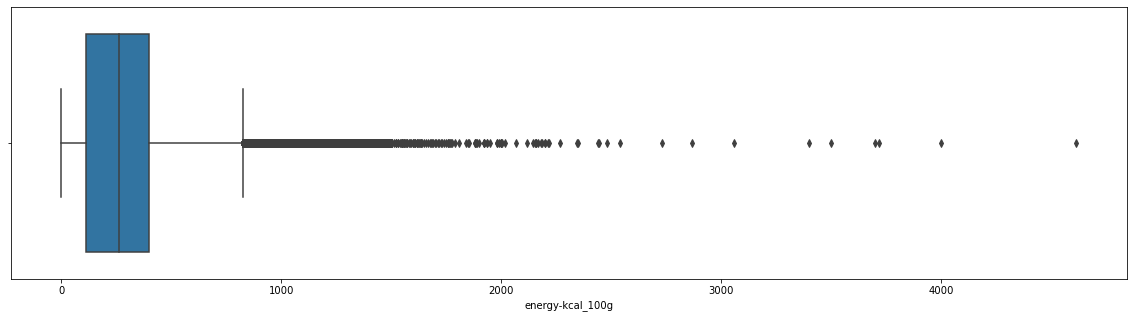

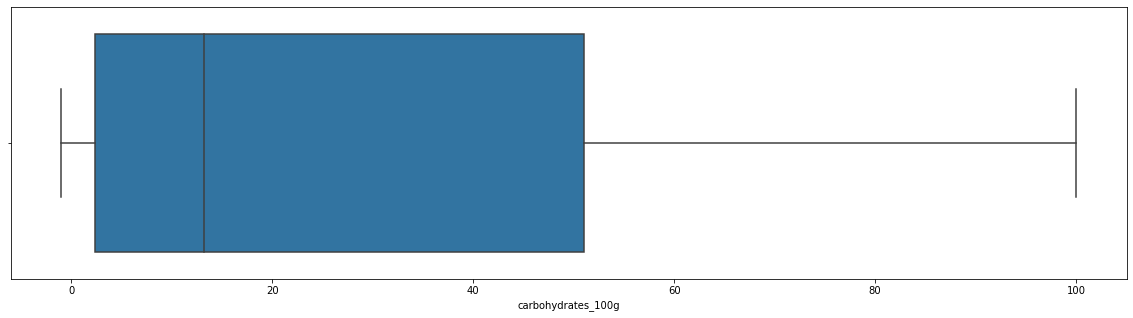

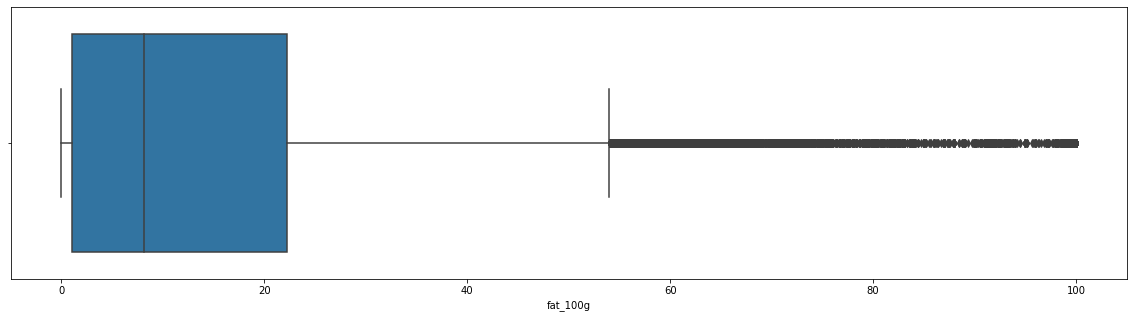

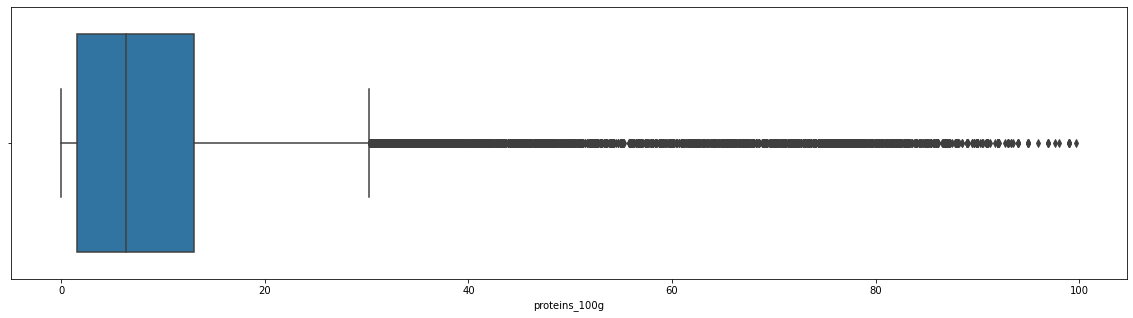

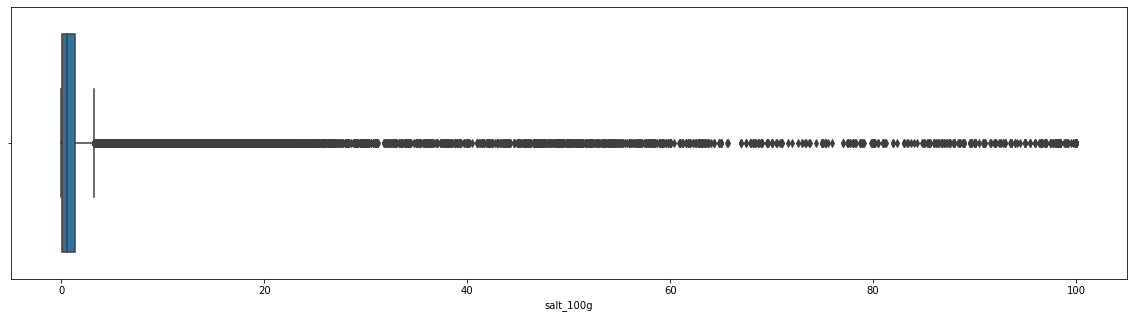

In [89]:
import warnings
warnings.filterwarnings("ignore")
for col in data_f.select_dtypes(include = ['int32','float64']).columns:
    plt.figure(figsize=(20,5))    
    sns.boxplot(data_f[col])
    plt.show()

In [67]:
data_f.sort_values(by='salt_100g',ascending=False).head(10)

,code,product_name,brands,pnns_groups_1,pnns_groups_2,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries
179018,3165721310900,Fleur de sel de Guérande,NaN,unknown,unknown,"Epicerie, Condiments, Sels, Sels français, Sel...",0.0,0.0,0.0,0.0,100.0,France
2016,16000144811,Reesés puffs,Reese's,unknown,unknown,NaN,35.0,16.0,4.0,2.0,100.0,en:fr
626909,80321200,Sale iposodico,NaN,unknown,unknown,NaN,15.0,0.0,0.0,0.0,100.0,France
576030,5601118000040,Saldomar (Meersalz),NaN,unknown,unknown,NaN,0.0,0.0,0.0,0.0,100.0,France
239483,3263850312113,Moulin gros sel,"Leader Price,Leader price",unknown,unknown,NaN,0.0,0.0,0.0,0.0,100.0,France
576031,5601118000200,Golfiho,NaN,unknown,unknown,NaN,0.0,0.0,0.0,0.0,100.0,France
58879,0783987851901,Rub Your Burger 6.5-oz Burger Seasoning Blend,BBQ SPOT,Fat and sauces,Dressings and sauces,"Groceries, Sauces",0.0,0.0,0.0,0.0,100.0,France
239373,3263850052613,Gros sel de Guérande,NaN,unknown,unknown,"Epicerie, Condiments, Sels, Sels français, Sel...",0.0,0.0,0.0,0.0,100.0,France
239372,3263850052514,Fleur de sel de Guérande,Franprix,unknown,unknown,"Epicerie, Condiments, Sels, Sels français, Sel...",0.0,0.0,0.0,0.0,100.0,France
239371,3263850052415,Sel fin de Guérande,leader price,unknown,unknown,"Aliments et boissons à base de végétaux, Alime...",1.0,0.0,0.0,0.0,100.0,France


In [68]:
data_f.sort_values(by='fat_100g',ascending=False).head(10)

,code,product_name,brands,pnns_groups_1,pnns_groups_2,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries
351191,3490391550036,Huile de noisette,NaN,Fat and sauces,Fats,"Aliments et boissons à base de végétaux, Alime...",900.0,0.0,100.0,0.0,0.00,France
246764,3265478475003,Huile bio Colza & sésame grillé,Lesieur,Fat and sauces,Fats,"Aliments et boissons à base de végétaux, Alime...",900.0,0.0,100.0,0.0,NaN,France
246763,3265478468005,Huile le sieur 1l +20% gratuit,Lesieur,unknown,unknown,NaN,900.0,0.0,100.0,0.0,NaN,France
402351,3596710477739,Huile de colza fruité sésame,Auchan,Fat and sauces,Fats,"Aliments et boissons à base de végétaux, Alime...",900.0,0.5,100.0,0.5,0.00,France
531533,4260087080340,Huile de coco,NaN,Fat and sauces,Fats,fr:Huile de Coco,899.0,0.0,100.0,0.0,0.03,France
365897,3542330000130,Huile d'olive vierge extra,NaN,Fat and sauces,Fats,"Aliments et boissons à base de végétaux, Alime...",900.0,0.0,100.0,0.0,0.00,France
246762,3265478459003,Bidon 5L Puget Restauration,"Puget Restauration,Purget",Fat and sauces,Fats,"Aliments et boissons à base de végétaux, Alime...",900.0,0.0,100.0,0.0,0.00,France
246756,3265478347003,Huile d'olive vierge extra aux extraits nature...,puget,Fat and sauces,Fats,"Aliments et boissons à base de végétaux, Alime...",NaN,0.0,100.0,0.0,NaN,France
246755,3265478264003,Lesieur Secret de méditerranée,Lesieur,Fat and sauces,Fats,"Aliments et boissons à base de végétaux, Alime...",900.0,0.0,100.0,0.0,0.00,France
246753,3265478090008,Lesieur Professionnel Huile à pizza pimentée,"Lesieur,Lesieur Professionnel",Fat and sauces,Fats,"Oils, fr:Huile à pizza, fr:Huile à pizza pimen...",900.0,0.0,100.0,0.0,0.00,France


In [90]:
data_f[data_f['proteins_100g'] == 100 ]

,code,product_name,brands,pnns_groups_1,pnns_groups_2,categories,energy-kcal_100g,carbohydrates_100g,fat_100g,proteins_100g,salt_100g,countries


Les valeurs extrèmes (100g) pour le taux de lipide et de sel correspondent respectivement à des huiles et des sels. Rien d'anormal.
Par contre, on exclut de notre analyse les aliments contenant 100g de protéines.
Concernant l'energie maximum, il ne peut excéder 900 calories pour 100g car c'est la maximum atteint pour 100g de lipides.

In [248]:
def clean_outliers(data_f):
    #data_f.drop(index=data_f[data_f['energy-kcal_100g'] == 1360000.0].index, inplace=True)
    data_f['carbohydrates_100g'] = data_f['carbohydrates_100g'].replace([704.5],70.45)
    data_f['salt_100g'] = data_f['salt_100g'].replace([2250.0],np.nan)
    data_f.drop(data_f[data_f['proteins_100g'] == 100 ].index, inplace=True)
    data_f.drop(data_f[data_f['carbohydrates_100g'] < 0].index, inplace=True)
    data_f.drop(data_f[data_f['energy-kcal_100g'] > 900].index, inplace=True)
    data_f.drop(data_f[data_f['sugars_100g'] < 0].index, inplace=True)
    a = data_f.columns[data_f.columns.str.endswith('_100g')].tolist()
    a.remove('energy-kcal_100g')
    for col in a:        
        for index in data_f[data_f[col] > 100].index:               
                data_f.drop(index=index, inplace=True)  

In [249]:
def traitement_données():
    #data = pd.read_csv('C:\\Users\\Public\\Documents\\en.openfoodfacts.org.products.csv',sep='\t')
    #data_f = filtre_colonnes(data)
    #data_f = filtre_pays(data_f)
    data_f = pd.read_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet3-Openclassrooms-master\\Projet3-Openclassrooms-master\\data_f.csv')
    data_f = del_nan(data_f, 0.9)
    clean_outliers(data_f)
    data_f.drop(columns=['countries'],inplace=True)
    return data_f

In [250]:
data_f = traitement_données()

In [251]:
data_f.to_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet3-Openclassrooms-master\\Projet3-Openclassrooms-master\\data_cleaned.csv', index=False)
